## Exploratory Data Analysis

####  Reading the Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('Datasets/train.csv')

In [6]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [8]:
df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
# Printing the maximum number of characters in the train data
df['full_text'].apply(lambda x: len(x)).max()

6044

In [14]:
# Printing the minimum number of characters in the train data
df['full_text'].apply(lambda x: len(x)).min()

82

In [16]:
# Printing the maximum number of words in the train data
df['full_text'].apply(lambda x: len(x.split(' '))).max()

5061

In [17]:
# Printing the minimum number of words in the train data
df['full_text'].apply(lambda x: len(x.split(' '))).min()

11

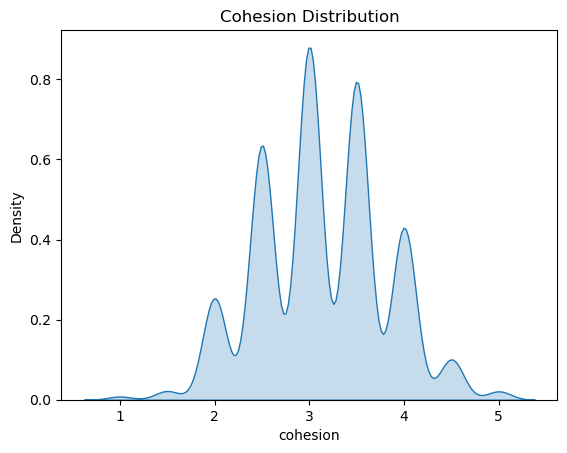

In [21]:
sns.kdeplot(df['cohesion'], fill = True)
plt.title("Cohesion Distribution")
plt.show()

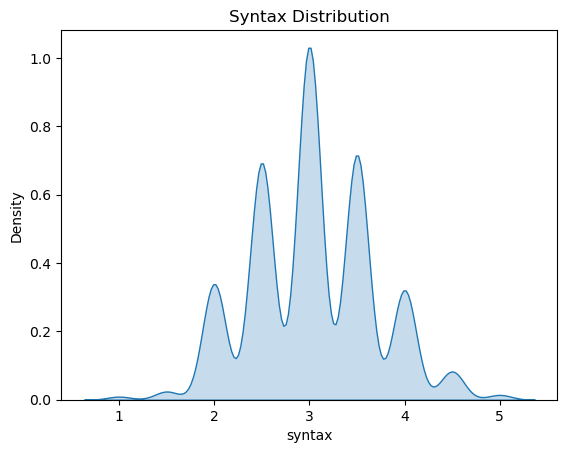

In [23]:
sns.kdeplot(df['syntax'], fill = True)
plt.title("Syntax Distribution")
plt.show()

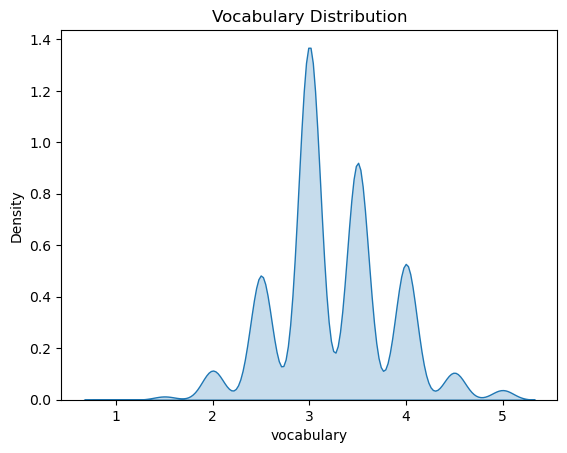

In [24]:
sns.kdeplot(df['vocabulary'], fill = True)
plt.title("Vocabulary Distribution")
plt.show()

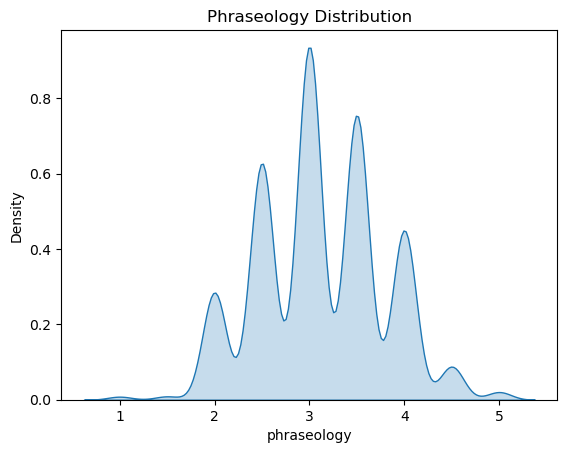

In [25]:
sns.kdeplot(df['phraseology'], fill = True)
plt.title("Phraseology Distribution")
plt.show()

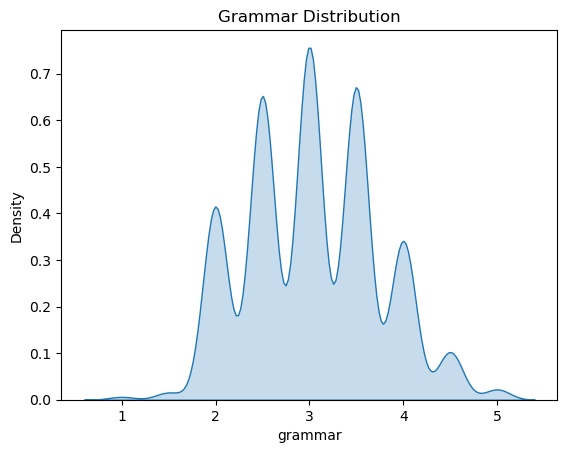

In [26]:
sns.kdeplot(df['grammar'], fill = True)
plt.title("Grammar Distribution")
plt.show()

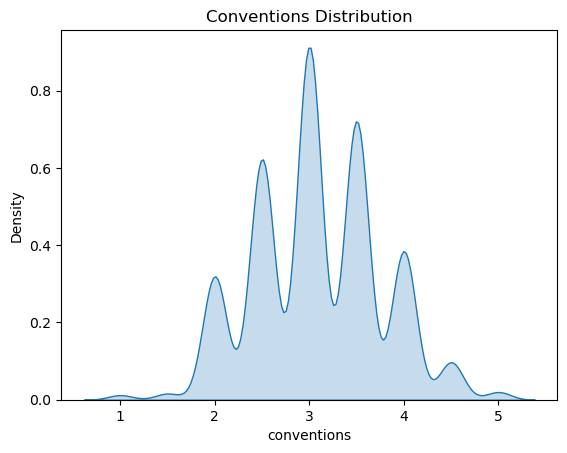

In [27]:
sns.kdeplot(df['conventions'], fill = True)
plt.title("Conventions Distribution")
plt.show()

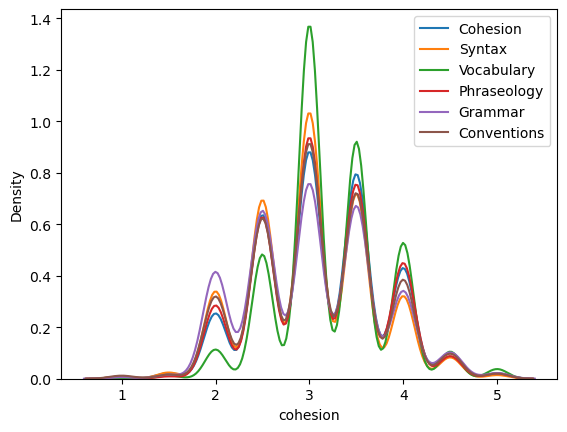

In [37]:
sns.kdeplot(df['cohesion'], label = 'Cohesion')
sns.kdeplot(df['syntax'], label = 'Syntax')
sns.kdeplot(df['vocabulary'], label = 'Vocabulary')
sns.kdeplot(df['phraseology'], label = 'Phraseology')
sns.kdeplot(df['grammar'], label = 'Grammar')
sns.kdeplot(df['conventions'], label = 'Conventions')

plt.legend()
plt.show()

In [39]:
df['full_text'].iloc[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [41]:
# Testing to check and replace '\n' from the text and make a cleaner text
df['full_text'].iloc[0].replace('\n', '')

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a sh

In [43]:
df['full_text_preprocessed'] = df['full_text'].apply(lambda x: x.replace('\n', ''))

In [46]:
# Checking to see if the preprocessed text does not contain '\n' characters
df['full_text_preprocessed'].iloc[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a sh

In [49]:
# Removing punctuations from the text
import string

translator = str.maketrans('', '', string.punctuation)
df['full_text_preprocessed'] = df['full_text_preprocessed'].apply(lambda x: x.translate(translator))

In [51]:
df['full_text_preprocessed'].iloc[0]

'I think that students would benefit from learning at homebecause they wont have to change and get up early in the morning to shower and do there hair taking only classes helps them because at there house theyll be pay more attention they will be comfortable at homeThe hardest part of school is getting ready you wake up go brush your teeth and go to your closet and look at your cloths after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain Then youll have to change with the online classes you can wear anything and stay home and you wont need to stress about what to wearmost students usually take showers before school they either take it before they sleep or when they wake up some students do both to smell good that causes them do miss the bus and effects on there lesson time cause they come late to school when u have online classes u wont need to miss lessons cause you can get everything set up and go take a shower and when u

In [53]:
df['full_text'].iloc[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [66]:
import re
import string
from nltk.corpus import words



In [67]:
def text_preprocessing(text, english_words = words):

    # Get a list of all English words
    english_words = set(english_words.words())

    # Define a regular expression to match only alphanumeric characters
    regex = re.compile('[^a-zA-Z0-9\s]')

    # Remove all punctuation characters and convert to lowercase
    text = regex.sub('', text.lower())

    # Split the text into words
    words = text.split()

    # Filter out words that are not English words
    english_words_only = [word for word in words if word in english_words]

    # Join the English words into a string
    english_text = ' '.join(english_words_only)
    
    return english_text

In [ ]:
# This can take about 5 minutes to run 
df['full_text'].apply(text_preprocessing)